### Heterogeneity of the contemporary European welfare states - comparative analysis of classical and modern clustering methods

##### Author: Piotr Nowicki

This jupyter notebook presents code for my student project. It does not provide the whole context, nor does it discuss exhaustively results. It is only a showcase of the code part of the project. If you have any questions, you can contact me.

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, rand_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import style
import plotly.graph_objs as go
import docx

In [5]:
np.random.seed(14012023)

The data were collected from different sources (Eurostat, ILO, SWIID). They refer to various social spending (in relation to GDP or total expenditures), taxes (as % of GDP or total receipts), civil engagement, trust, difference between male and female employment rates, union and collective bargaining coverage rates, and income inequality (for disposable and market incomes). They were all gathered together in a separable file by my colleague.

In [6]:
data = pd.read_csv("data_final.csv")

In [7]:
data.head()

,Country,Disability_EXP,Fam_child_EXP,Housing_EXP,Sickness_EXP,Soc_prot_toGDP,Tot_EXP_toGDP,Unemployment_EXP,Tot_receipts,VAT,...,Diff_employment_MF,Formal_VA,Informal_VA,Pub_exp_edu,Union_density_rate,Barg_cov_rate,Trust_others,Trust_polSys,gini_disp,gini_mkt
0,Austria,5.99,9.01,0.28,26.22,28.6,29.3,5.24,43.0,17.8,...,8.8,28.3,28.3,4.71,26.24,98.0,5.9,4.4,27.6,49.4
1,Belgium,8.83,7.20,0.82,26.01,27.3,28.7,5.22,45.1,14.9,...,8.0,20.4,20.8,6.25,49.08,96.0,5.7,4.6,26.2,48.6
2,Bulgaria,8.02,9.62,0.00,29.19,16.0,16.5,2.79,30.2,30.5,...,8.1,5.2,6.3,4.20,13.70,10.8,4.2,2.6,38.9,49.1
3,Switzerland,8.14,5.74,1.20,29.60,25.6,27.1,2.88,27.3,11.3,...,8.7,36.5,48.2,4.77,14.43,47.7,6.4,6.6,30.6,43.7
4,Cyprus,3.96,5.68,1.77,24.68,17.7,18.1,4.85,34.0,26.2,...,11.6,7.2,2.6,5.24,43.28,43.3,4.5,2.6,30.1,49.7


In [8]:
data.columns

Index(['Country', 'Disability_EXP', 'Fam_child_EXP', 'Housing_EXP',
       'Sickness_EXP', 'Soc_prot_toGDP', 'Tot_EXP_toGDP', 'Unemployment_EXP',
       'Tot_receipts', 'VAT', 'Current_taxes', 'Net_soc_cont',
       'Diff_employment_MF', 'Formal_VA', 'Informal_VA', 'Pub_exp_edu',
       'Union_density_rate', 'Barg_cov_rate', 'Trust_others', 'Trust_polSys',
       'gini_disp', 'gini_mkt'],
      dtype='object')

Statistical description

In [9]:
stats = data.describe().round(2).T
stats

,count,mean,std,min,25%,50%,75%,max
Disability_EXP,30.0,8.08,3.30,3.76,5.70,8.08,9.26,16.06
Fam_child_EXP,30.0,8.96,2.95,3.90,6.28,9.22,10.54,15.31
Housing_EXP,30.0,0.94,0.98,0.00,0.16,0.46,1.50,3.87
Sickness_EXP,30.0,28.56,4.48,20.33,25.88,28.46,32.34,38.17
Soc_prot_toGDP,30.0,22.29,5.56,13.30,16.65,22.45,27.25,31.20
Tot_EXP_toGDP,30.0,22.95,5.90,13.90,17.00,23.10,28.48,33.40
Unemployment_EXP,30.0,3.42,1.59,0.30,2.61,2.96,4.76,7.02
Tot_receipts,30.0,36.69,6.12,22.60,33.62,36.40,41.58,47.70
VAT,30.0,21.43,5.12,11.30,18.27,21.15,23.78,35.60
Current_taxes,30.0,31.88,12.05,17.30,22.02,29.35,38.50,65.30


In [ ]:
# Preparing a summary table of the variables
doc = docx.Document()
t = doc.add_table(rows=1, cols=stats.shape[1]+1)

t.style = 'TableGrid'

t.cell(0, 0).text = 'variable'
for j in range(stats.shape[1]):
    t.cell(0, j+1).text = stats.columns[j]

for i in range(stats.shape[0]):
    row = t.add_row()
    row.cells[0].text = stats.index[i]
    for j in range(stats.shape[1]):
        cell = stats.iat[i, j]
        row.cells[j+1].text = str(cell)

# doc.save('summary_table.docx')

Standardisation of the data for further analysis

In [11]:
data_y = data[['Country']] # countries labels
data_x = data.iloc[:, 1:] # select numeric variables
data_scaled = (data_x - np.mean(data_x, axis=0))/np.std(data_x, axis=0) # standardisation

In [12]:
data_scaled.shape

(30, 21)

In [13]:
np.round([variance_inflation_factor(data.iloc[:,1:], i) for i in range(data.shape[1]-1)], 2) # VIF for the non-standardised variables. Strong relationships.

array([4.536000e+01, 4.517000e+01, 9.550000e+00, 1.003200e+02,
       1.334791e+04, 1.378173e+04, 2.456000e+01, 4.900800e+02,
       1.328200e+02, 1.391100e+02, 6.467000e+01, 1.944000e+01,
       5.633000e+01, 2.589000e+01, 1.694900e+02, 2.502000e+01,
       3.614000e+01, 2.023900e+02, 2.917000e+01, 4.616500e+02,
       9.280000e+02])

In [14]:
np.round([variance_inflation_factor(data_scaled, i) for i in range(data_scaled.shape[1])], 2) # VIF for the standardised variables. Values indicate medium/strong correlations between the variables. 

array([  6.62,   4.41,   5.18,   3.96, 784.33, 877.18,   4.22,  22.88,
         8.  ,  37.1 ,  15.2 ,   4.35,  18.34,  12.63,   7.54,   9.18,
         8.72,   4.16,   3.22,  10.75,   6.22])

### PCA

Dimensionality reduction is conducted because of multicollinearity of the data.

In [15]:
pca = PCA()
X = pca.fit_transform(data_scaled)

In [16]:
print(pca.explained_variance_, '\n') # eigenvalues
print(pca.explained_variance_ratio_*100) # percentage of explained variance

[8.04862873e+00 3.55857400e+00 1.87950677e+00 1.74409028e+00
 1.37113107e+00 1.25437584e+00 8.67145881e-01 6.37815426e-01
 5.80362121e-01 4.29757206e-01 3.17251879e-01 2.85806189e-01
 1.92049564e-01 1.39225005e-01 1.36550579e-01 9.51459451e-02
 8.50287456e-02 5.12571929e-02 3.63066408e-02 1.35088694e-02
 6.20001976e-04] 

[3.70492434e+01 1.63807374e+01 8.65169784e+00 8.02835207e+00
 6.31155572e+00 5.77411100e+00 3.99162390e+00 2.93597577e+00
 2.67150818e+00 1.97824746e+00 1.46036579e+00 1.31561579e+00
 8.84037675e-01 6.40877006e-01 6.28566155e-01 4.37973398e-01
 3.91402162e-01 2.35945809e-01 1.67125807e-01 6.21836843e-02
 2.85397735e-03]


In [17]:
print(np.mean(pca.explained_variance_)) # mean eigenvalue
print(sum(pca.explained_variance_ >= np.mean(pca.explained_variance_))) # How many eigenvalues are higher than the mean?

1.03448275862069
6


In [18]:
sum(pca.explained_variance_ratio_*100 >= 5) # How many eigenvalues do explain more than 5% of variance?

6

In [19]:
np.cumsum(pca.explained_variance_ratio_*100) # cumulative explained variance

array([ 37.04924335,  53.4299808 ,  62.08167864,  70.11003072,
        76.42158644,  82.19569744,  86.18732134,  89.12329711,
        91.79480529,  93.77305274,  95.23341854,  96.54903433,
        97.433072  ,  98.07394901,  98.70251516,  99.14048856,
        99.53189072,  99.76783653,  99.93496234,  99.99714602,
       100.        ])

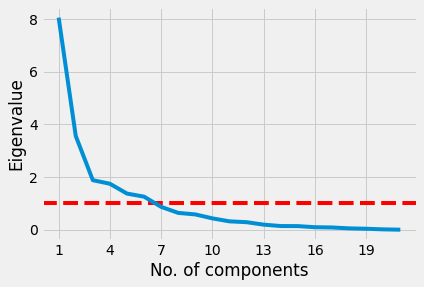

In [20]:
# Eigenvalues plot. The red line indicates an eigenvalue of 1.

plt.style.use('fivethirtyeight')
plt.ylabel('Eigenvalue')
plt.xlabel('No. of components')
plt.xticks(ticks = np.arange(len(pca.explained_variance_), step=3), labels = np.arange(1, len(pca.explained_variance_), step=3))
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(pca.explained_variance_)

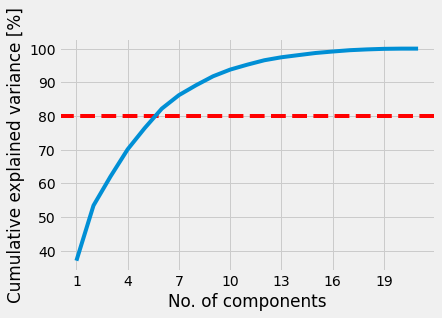

In [21]:
# Cumulative explained variance. The red line indicates explained variance at the level of 80%.

plt.style.use('fivethirtyeight')
plt.ylabel('Cumulative explained variance [%]')
plt.xlabel('No. of components')
plt.xticks(ticks = np.arange(len(pca.explained_variance_), step=3), labels = np.arange(1, len(pca.explained_variance_), step=3))
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))

Up to the 6th principal component the eigenvalues are higher than the mean and one. Also, the cumulative explained variance is higher than 80% and each of the 6 principal components explain more than 5% of variance.

In [22]:
# PCA for 6 components
pca1 = PCA(n_components=6)
X = pca1.fit_transform(data_scaled)

In [23]:
X.shape

(30, 6)

### Hierarchical clustering

Hierarchical clustering was chosen because it was found to be commonly used in literature.

In [24]:
# defining a function to plot dendrograms
# Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Change "Czech_Republic" to "Czechia". It will better fit in graphs.

In [ ]:
czech = np.where(data_y.Country == "Czech_Republic")[0]
data_y.iloc[czech, ] = "Czechia"

Plotting dendrograms for different linkage methods.

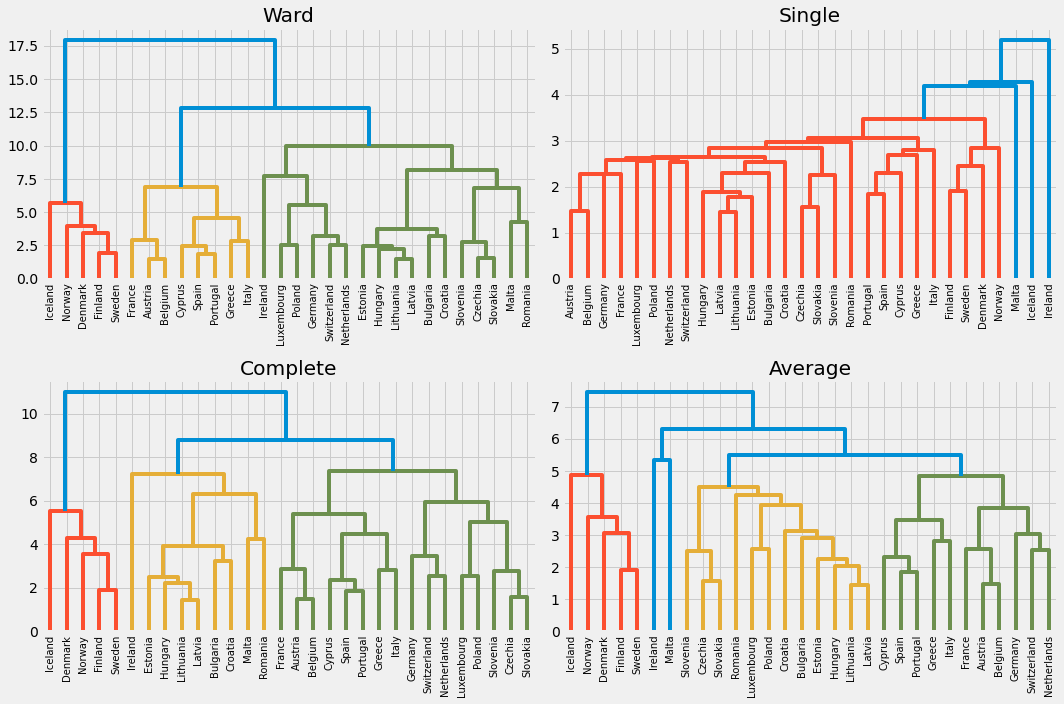

In [26]:
agg_clust1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
hierarchical_model1 = agg_clust1.fit(X)
agg_clust2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')
hierarchical_model2 = agg_clust2.fit(X)
agg_clust3 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
hierarchical_model3 = agg_clust3.fit(X)
agg_clust4 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
hierarchical_model4 = agg_clust4.fit(X)

fig, ax = plt.subplots(2, 2, figsize=(15,10))

plot_dendrogram(hierarchical_model1, labels=np.array(data_y.Country), leaf_font_size=10, ax=ax[0,0], leaf_rotation=90)
plot_dendrogram(hierarchical_model2, labels=np.array(data_y.Country), leaf_font_size=10, ax=ax[0,1], leaf_rotation=90)
plot_dendrogram(hierarchical_model3, labels=np.array(data_y.Country), leaf_font_size=10, ax=ax[1,0], leaf_rotation=90)
plot_dendrogram(hierarchical_model4, labels=np.array(data_y.Country), leaf_font_size=10, ax=ax[1,1], leaf_rotation=90)

ax[0,0].set_title('Ward')
ax[0,1].set_title('Single')
ax[1,0].set_title('Complete')
ax[1,1].set_title('Average')

fig.tight_layout()
plt.show()

Silhouette statistics for various number of clusters.

In [27]:
silhouette_scores1 = []
silhouette_scores2 = []
silhouette_scores3 = []
silhouette_scores4 = []

for i in range(3, 20):
    clust1 = AgglomerativeClustering(n_clusters=i, linkage='ward').fit(X)
    clust2 = AgglomerativeClustering(n_clusters=i, linkage='single').fit(X)
    clust3 = AgglomerativeClustering(n_clusters=i, linkage='complete').fit(X)
    clust4 = AgglomerativeClustering(n_clusters=i, linkage='average').fit(X)

    silhouette_scores1.append(silhouette_score(X, clust1.labels_))
    silhouette_scores2.append(silhouette_score(X, clust2.labels_))
    silhouette_scores3.append(silhouette_score(X, clust3.labels_))
    silhouette_scores4.append(silhouette_score(X, clust4.labels_))

Silhouette statistics plots.

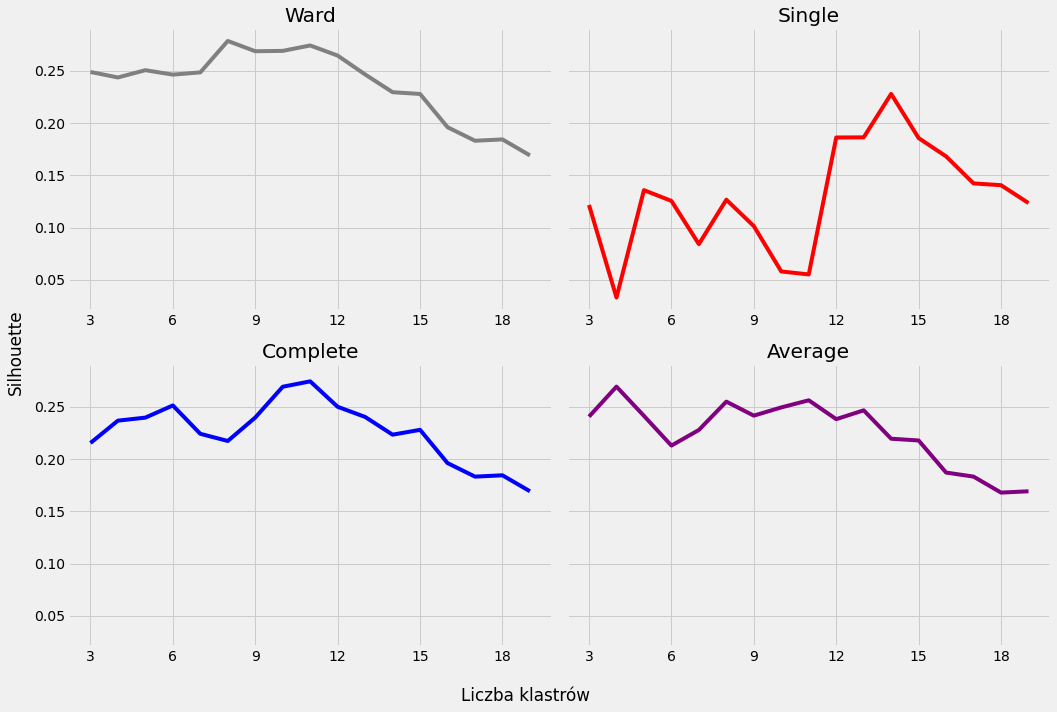

In [28]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

fig.supylabel('Silhouette')
fig.supxlabel('Liczba klastrów')

ax[0,0].set_title('Ward')
ax[0,1].set_title('Single')
ax[1,0].set_title('Complete')
ax[1,1].set_title('Average')

ax[0,0].set_xticks(ticks = np.arange(0, 17, step=3),labels = np.arange(3,20, step=3))
ax[0,1].set_xticks(ticks = np.arange(0, 17, step=3),labels = np.arange(3,20, step=3))
ax[1,0].set_xticks(ticks = np.arange(0, 17, step=3),labels = np.arange(3,20, step=3))
ax[1,1].set_xticks(ticks = np.arange(0, 17, step=3),labels = np.arange(3,20, step=3))

ax[0,0].plot(silhouette_scores1, color='gray')
ax[0,1].plot(silhouette_scores2, color='red')
ax[1,0].plot(silhouette_scores3, color='blue')
ax[1,1].plot(silhouette_scores4, color='purple')

fig.tight_layout()

Maximum silhouette statistics values.

In [29]:
print('Ward: {} \n Single: {} \n Complete: {} \n Average: {} \n'.format(
np.max(silhouette_scores1), 
np.max(silhouette_scores2), 
np.max(silhouette_scores3), 
np.max(silhouette_scores4)))

Ward: 0.27859862554089154 
 Single: 0.22793208827708575 
 Complete: 0.27427917713339595 
 Average: 0.26922768037526973 



Searching for a cut-off point to colour properly the dendrograms (replace arguments 'model' and 'p').

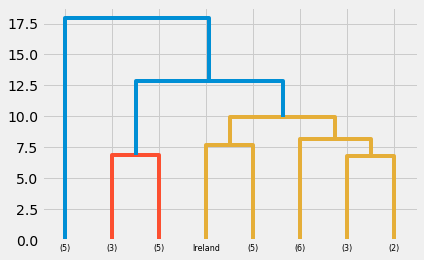

In [30]:
plot_dendrogram(hierarchical_model1, labels=np.array(data_y.Country), leaf_font_size=8, truncate_mode='lastp', p=8)

Plotting dendrograms for the optimum numbers of clusters (based on the silhouette statistics). Linkage 'single' is omitted because it doesn't make sense.

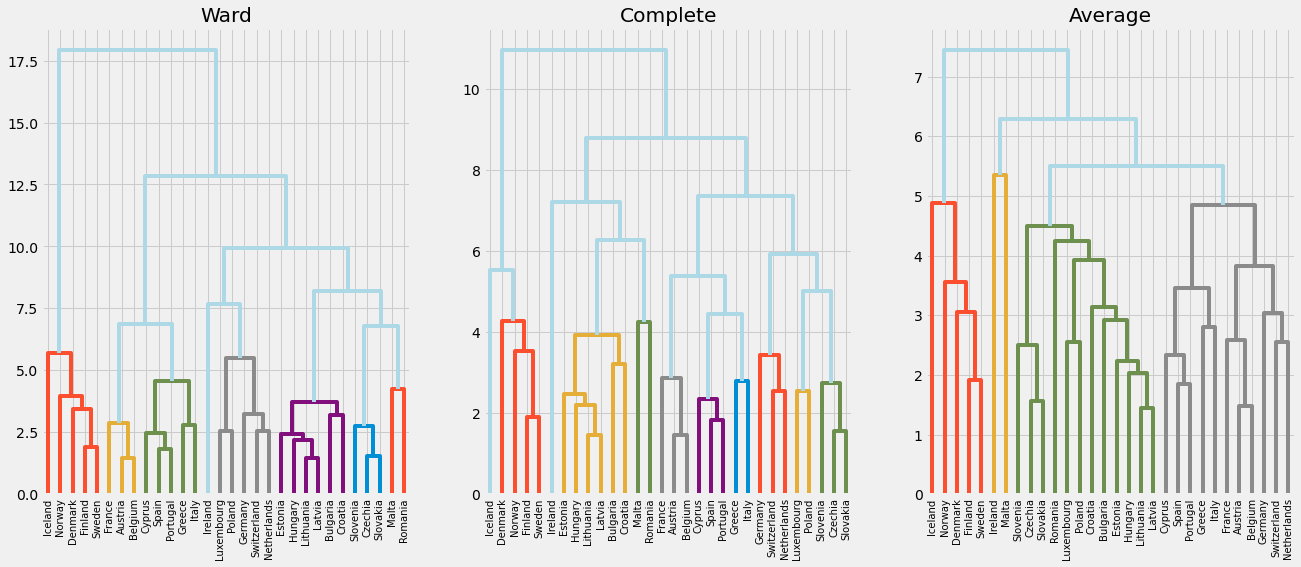

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))

ax[0].set_title('Ward')
ax[1].set_title('Complete')
ax[2].set_title('Average')

plot_dendrogram(hierarchical_model1, labels=np.array(data_y.Country), leaf_font_size=10, color_threshold=6, leaf_rotation=90, ax=ax[0], above_threshold_color='lightblue')
plot_dendrogram(hierarchical_model3, labels=np.array(data_y.Country), leaf_font_size=10, color_threshold=4.3, leaf_rotation=90, ax=ax[1], above_threshold_color='lightblue')
plot_dendrogram(hierarchical_model4, labels=np.array(data_y.Country), leaf_font_size=10, color_threshold=5.4, leaf_rotation=90, ax=ax[2], above_threshold_color='lightblue')

### DBSCAN

DBSCAN was chosen as a modern clustering method. As far as I know, it hasn't benn applied to the subject before in the literature.

Searching for optimal epsilon in [2, 3.5] (the interval was chosen to not classify all observations either as a noise or belonging to one cluster). Calculations conducted for minPts = 3 and minPts = 4.

The tables below indicate that for minPts = 3 the highest silhouette statistic, the calinski-harabasz score and the lowest number of noise observations are for epsilons equal to 3.1 or 3.5. Epsilon = 3 is not much different from the rest, and it creates more clusters.

For minPts = 4 the optimal epsilon would be 3.1 or 3 - based on calinski-harabasz score, the number of clusters and the number of noise observations.

In [32]:
optimal_eps3 = pd.DataFrame(columns=['n_clusters', 'silhouette', 'calinski_harabasz', 'noise', 'epsilon'])

for i, j in enumerate(np.arange(2, 3.6, 0.1)):
    dbscan = DBSCAN(eps = j, min_samples = 3).fit(X)
    n_clusters = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    silhouette = silhouette_score(X, dbscan.labels_)
    calinski_harabasz = calinski_harabasz_score(X, dbscan.labels_)
    noise = sum(dbscan.labels_ == -1)
    optimal_eps3.loc[i] = [n_clusters, silhouette, calinski_harabasz, noise, j]

optimal_eps3.sort_values('silhouette', ascending=False)

,n_clusters,silhouette,calinski_harabasz,noise,epsilon
11,2.0,0.244034,7.156968,3.0,3.1
12,2.0,0.244034,7.156968,3.0,3.2
13,2.0,0.244034,7.156968,3.0,3.3
14,2.0,0.244034,7.156968,3.0,3.4
15,1.0,0.197082,2.708768,3.0,3.5
10,3.0,0.152455,6.593264,3.0,3.0
9,3.0,0.146812,6.155757,4.0,2.9
6,5.0,0.132783,4.475458,9.0,2.6
5,5.0,0.128740,4.426153,12.0,2.5
4,4.0,0.082579,3.248450,15.0,2.4


In [33]:
optimal_eps4 = pd.DataFrame(columns=['n_clusters', 'silhouette', 'calinski_harabasz', 'noise', 'epsilon'])

for i, j in enumerate(np.arange(2, 3.6, 0.1)):
    dbscan = DBSCAN(eps = j, min_samples = 4).fit(X)
    n_clusters = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    silhouette = silhouette_score(X, dbscan.labels_)
    calinski_harabasz = calinski_harabasz_score(X, dbscan.labels_)
    noise = sum(dbscan.labels_ == -1)
    optimal_eps4.loc[i] = [n_clusters, silhouette, calinski_harabasz, noise, j]

optimal_eps4.sort_values('silhouette', ascending=False)

,n_clusters,silhouette,calinski_harabasz,noise,epsilon
12,2.0,0.244034,7.156968,3.0,3.2
13,2.0,0.244034,7.156968,3.0,3.3
14,2.0,0.244034,7.156968,3.0,3.4
11,3.0,0.215375,8.615846,3.0,3.1
15,2.0,0.211376,5.604939,3.0,3.5
10,4.0,0.188857,7.865393,5.0,3.0
9,4.0,0.172008,6.919496,6.0,2.9
7,3.0,0.081970,4.083424,13.0,2.7
8,3.0,0.081970,4.083424,13.0,2.8
6,2.0,0.028085,3.583597,20.0,2.6


Fitting DBSCAN for the chosen parameters.

In [34]:
dbscan1 = DBSCAN(eps = 3.1, min_samples = 3).fit(X)
dbscan2 = DBSCAN(eps = 3, min_samples = 3).fit(X)
dbscan3 = DBSCAN(eps = 3.1, min_samples = 4).fit(X)
dbscan4 = DBSCAN(eps = 3, min_samples = 4).fit(X)
cols = np.array(["red", "blue", "orange", "purple", "green", "cyan", "black", "pink", "brown", "gray", "yellow"])

Plotting the first two principal components with cluster for the chosen scenarios.

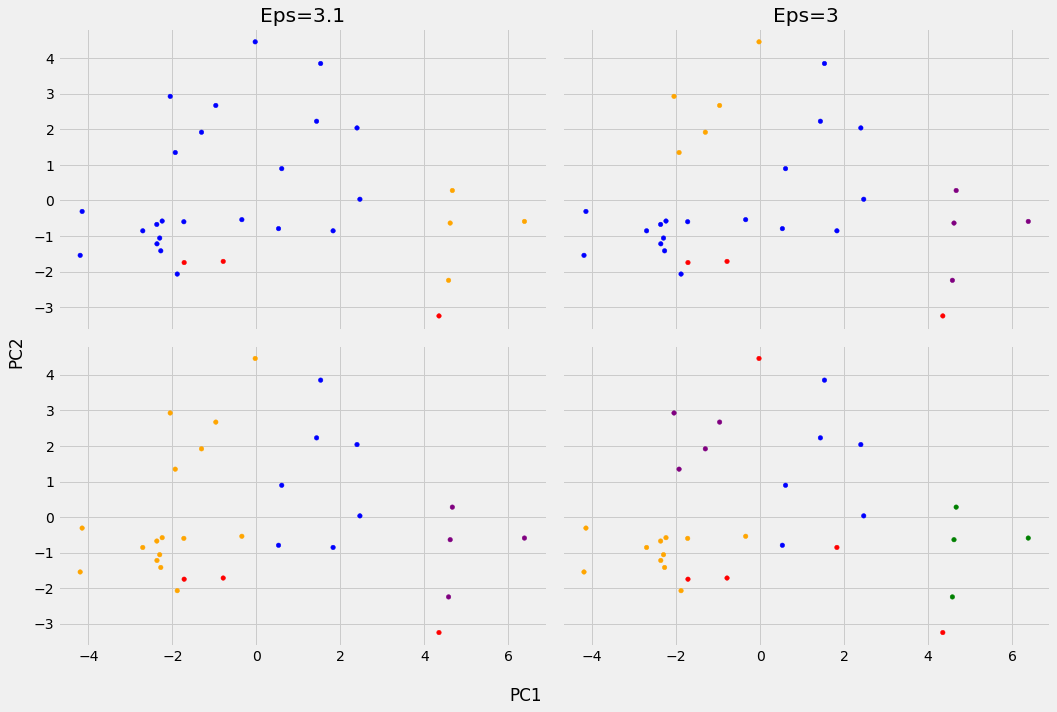

In [35]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(15,10))

fig.supxlabel("PC1")
fig.supylabel("PC2")

ax[0,0].set_title("Eps=3.1")
ax[0,1].set_title("Eps=3")

ax[0,0].scatter(X[:, 0], X[:, 1], s=20, color=cols[dbscan1.labels_ + 1])
ax[0,1].scatter(X[:, 0], X[:, 1], s=20, color = cols[dbscan2.labels_ + 1])
ax[1,0].scatter(X[:, 0], X[:, 1], s=20, color = cols[dbscan3.labels_ + 1])
ax[1,1].scatter(X[:, 0], X[:, 1], s=20, color = cols[dbscan4.labels_ + 1])

fig.tight_layout()
plt.show()

3D plots (replace the argument 'color' to have different dbscan labels).

In [36]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
trace = go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2], mode='markers',marker=dict(colorscale='Viridis', opacity=0.3, size = 10, color=dbscan3.labels_))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
dt = [trace]
fig = go.Figure(data = dt, layout = layout)
fig.show()

In [37]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
trace = go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2], mode='markers',marker=dict(colorscale='Viridis', opacity=0.3, size = 10, color=dbscan4.labels_))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
dt = [trace]
fig = go.Figure(data = dt, layout = layout)
fig.show()

### Comparing DBSCAN to hierarchical clustering

Linkage method 'ward' was chosen for hierarchical clustering and minPts = 4 with epsilons equal to 3 and 3.1 for further analysis based on the above outcomes.

In [38]:
agg_clust = AgglomerativeClustering(n_clusters=8, linkage='ward').fit(X)

In [39]:
# Rand index and adjusted Rand index

print(rand_score(agg_clust.labels_, dbscan3.labels_),
rand_score(agg_clust.labels_, dbscan4.labels_),
rand_score(dbscan3.labels_, dbscan4.labels_))

print(adjusted_rand_score(agg_clust.labels_, dbscan3.labels_),
adjusted_rand_score(agg_clust.labels_, dbscan4.labels_),
adjusted_rand_score(dbscan3.labels_, dbscan4.labels_))

0.7333333333333333 0.8344827586206897 0.8344827586206897
0.30178497301784973 0.4098583056979198 0.59675550405562


Plots with countries' labels

Text(0, 0.5, 'PC2')

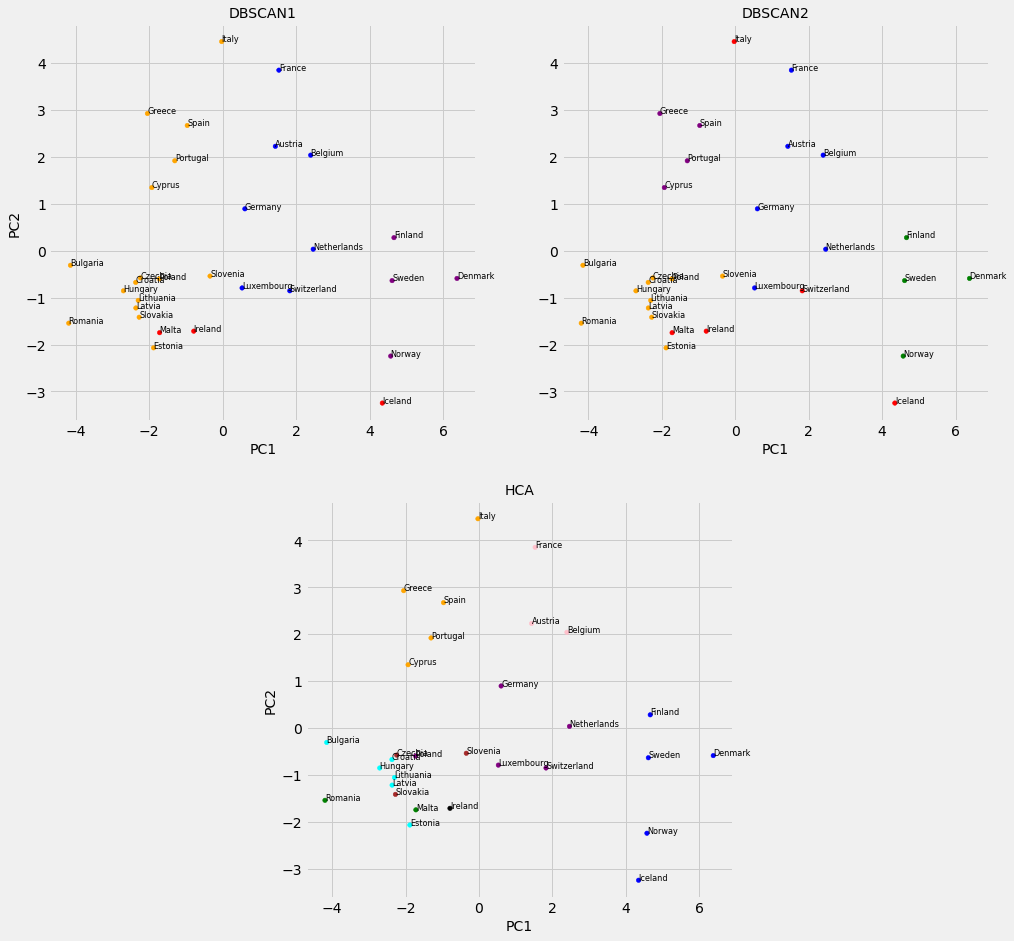

In [40]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(15,15), tight_layout=False)
spec = gridspec.GridSpec(nrows=2, ncols=4,  figure=fig, wspace=0.5, hspace=0.2)

ax1 = fig.add_subplot(spec[0, :2])
ax1.scatter(X[:, 0], X[:, 1], s=20, color=cols[dbscan3.labels_ + 1])
for i, label in enumerate(data_y.Country):
    plt.annotate(label, (X[i,0], X[i,1]), fontsize='xx-small')
ax1.set_title('DBSCAN1', fontsize='medium')
ax1.set_xlabel('PC1', fontsize='medium')
ax1.set_ylabel('PC2', fontsize='medium')

ax2 = fig.add_subplot(spec[0, 2:])
ax2.scatter(X[:, 0], X[:, 1], s=20, color=cols[dbscan4.labels_ + 1])
for i, label in enumerate(data_y.Country):
    plt.annotate(label, (X[i,0], X[i,1]), fontsize='xx-small')
ax2.set_title('DBSCAN2', fontsize='medium')
ax2.set_xlabel('PC1', fontsize='medium')

ax3 = fig.add_subplot(spec[1, 1:3])
ax3.scatter(X[:, 0], X[:, 1], s=20, color=cols[agg_clust.labels_ + 1])
for i, label in enumerate(data_y.Country):
    plt.annotate(label, (X[i,0], X[i,1]), fontsize='xx-small')
ax3.set_title('HCA', fontsize='medium')
ax3.set_xlabel('PC1', fontsize='medium')
ax3.set_ylabel('PC2', fontsize='medium')


### Appendix:
1. Calculation of loadings for every principal component
2. A table with assigned labels to countries for every method 
3. Mean value of the standardised variables within each cluster

In [41]:
# assigning clusters' labels

data_clust = data_scaled.copy()
data_clust = data_clust.join(data_y)
data_clust['dbscan3'] = dbscan3.labels_
data_clust['dbscan4'] = dbscan4.labels_
data_clust['agglomerative'] = agg_clust.labels_

In [42]:
# calculating loadings
loadings = pca1.components_.T * np.sqrt(pca1.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=data_scaled.columns)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6
Disability_EXP,0.636783,-0.468468,-0.309093,-0.299864,0.113033,0.007198
Fam_child_EXP,-0.004449,-0.577916,-0.360587,-0.413014,-0.324076,0.109560
Housing_EXP,0.428502,-0.095625,0.629341,-0.079365,-0.179405,-0.341048
Sickness_EXP,-0.223025,-0.555559,0.236820,0.421933,-0.043536,-0.456816
Soc_prot_toGDP,0.795893,0.529061,-0.231347,0.064411,-0.080067,0.047513
Tot_EXP_toGDP,0.789148,0.540251,-0.207466,0.072461,-0.106243,0.031661
Unemployment_EXP,0.252801,0.591114,0.328200,-0.262751,0.088092,-0.458392
Tot_receipts,0.612775,0.543146,-0.441695,-0.036864,0.068213,0.083253
VAT,-0.476573,-0.394289,-0.232306,-0.430247,0.468012,-0.158119
Current_taxes,0.794420,-0.176404,0.470578,0.016711,0.012928,0.207955


In [43]:
# countries and their labels
data_clust[['Country', 'dbscan3', 'dbscan4', 'agglomerative']].sort_values('agglomerative')

,Country,dbscan3,dbscan4,agglomerative
11,Finland,2,3,0
16,Iceland,-1,-1,0
7,Denmark,2,3,0
23,Norway,2,3,0
27,Sweden,2,3,0
4,Cyprus,1,2,1
9,Greece,1,2,1
10,Spain,1,2,1
25,Portugal,1,2,1
17,Italy,1,-1,1


Summarising variables with regard to clusters:

In [44]:
data_clust.groupby('agglomerative').mean().T.iloc[:-2,:].round(2)

agglomerative,0,1,2,3,4,5,6,7
Disability_EXP,1.58,-0.81,0.13,-1.02,0.17,-0.83,-0.35,-0.54
Fam_child_EXP,0.50,-1.28,0.41,-0.22,0.64,0.16,-0.44,-0.12
Housing_EXP,0.74,-0.48,0.04,-0.53,-0.36,3.05,0.13,-0.57
Sickness_EXP,-0.45,-1.03,0.16,0.89,0.23,2.18,-0.51,0.92
Soc_prot_toGDP,1.01,0.24,0.43,-1.38,-1.00,-1.65,1.23,-0.57
Tot_EXP_toGDP,0.94,0.21,0.47,-1.37,-1.00,-1.56,1.30,-0.57
Unemployment_EXP,0.03,0.83,-0.61,-1.71,-0.16,1.37,1.25,-0.67
Tot_receipts,0.84,0.21,-0.07,-1.36,-0.60,-2.34,1.38,-0.13
VAT,-0.00,-0.15,-0.92,0.21,1.46,-0.50,-1.09,-0.04
Current_taxes,1.35,-0.31,0.39,-0.12,-0.89,1.13,-0.04,-0.85


In [45]:
data_clust.groupby('dbscan3').mean().T.iloc[:-2, 1:].round(2)

dbscan3,0,1,2
Disability_EXP,0.05,-0.38,1.36
Fam_child_EXP,-0.17,-0.02,0.55
Housing_EXP,0.20,-0.50,0.79
Sickness_EXP,0.04,-0.11,-0.92
Soc_prot_toGDP,0.88,-0.51,1.15
Tot_EXP_toGDP,0.94,-0.52,1.09
Unemployment_EXP,0.31,-0.14,0.06
Tot_receipts,0.57,-0.30,1.12
VAT,-1.14,0.53,-0.08
Current_taxes,0.38,-0.72,1.27


In [46]:
data_clust.groupby('dbscan4').mean().T.iloc[:-2, 1:]

dbscan4,0,1,2,3
Disability_EXP,0.055750,-0.187438,-0.802828,1.360942
Fam_child_EXP,-0.007812,0.550866,-1.168951,0.549926
Housing_EXP,0.189698,-0.510025,-0.387530,0.793754
Sickness_EXP,0.010217,0.299757,-0.912309,-0.916282
Soc_prot_toGDP,0.928336,-0.848821,0.024093,1.149441
Tot_EXP_toGDP,0.982021,-0.852314,-0.004884,1.089762
Unemployment_EXP,0.421932,-0.586580,0.730950,0.055709
Tot_receipts,0.920729,-0.527699,0.030192,1.118780
VAT,-0.999805,0.832478,0.153052,-0.075532
Current_taxes,0.101314,-0.899676,-0.435511,1.274168
